In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [108]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### Jedna wartość na pewno musi zostać wyrzucona (u,g,x=-9999), nie ma ona sensu

In [109]:
df = df[df['u']>df['u'].mean()-3*df['u'].std()]

### Kolumna rerun_ID ma tylko jedną wartość

In [110]:
df.drop('rerun_ID', axis=1, inplace=True)

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>,
        <Axes: title={'center': 'spec_obj_ID'}>],
       [<Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>,
        <Axes: title={'center': 'fiber_ID'}>]], dtype=object)

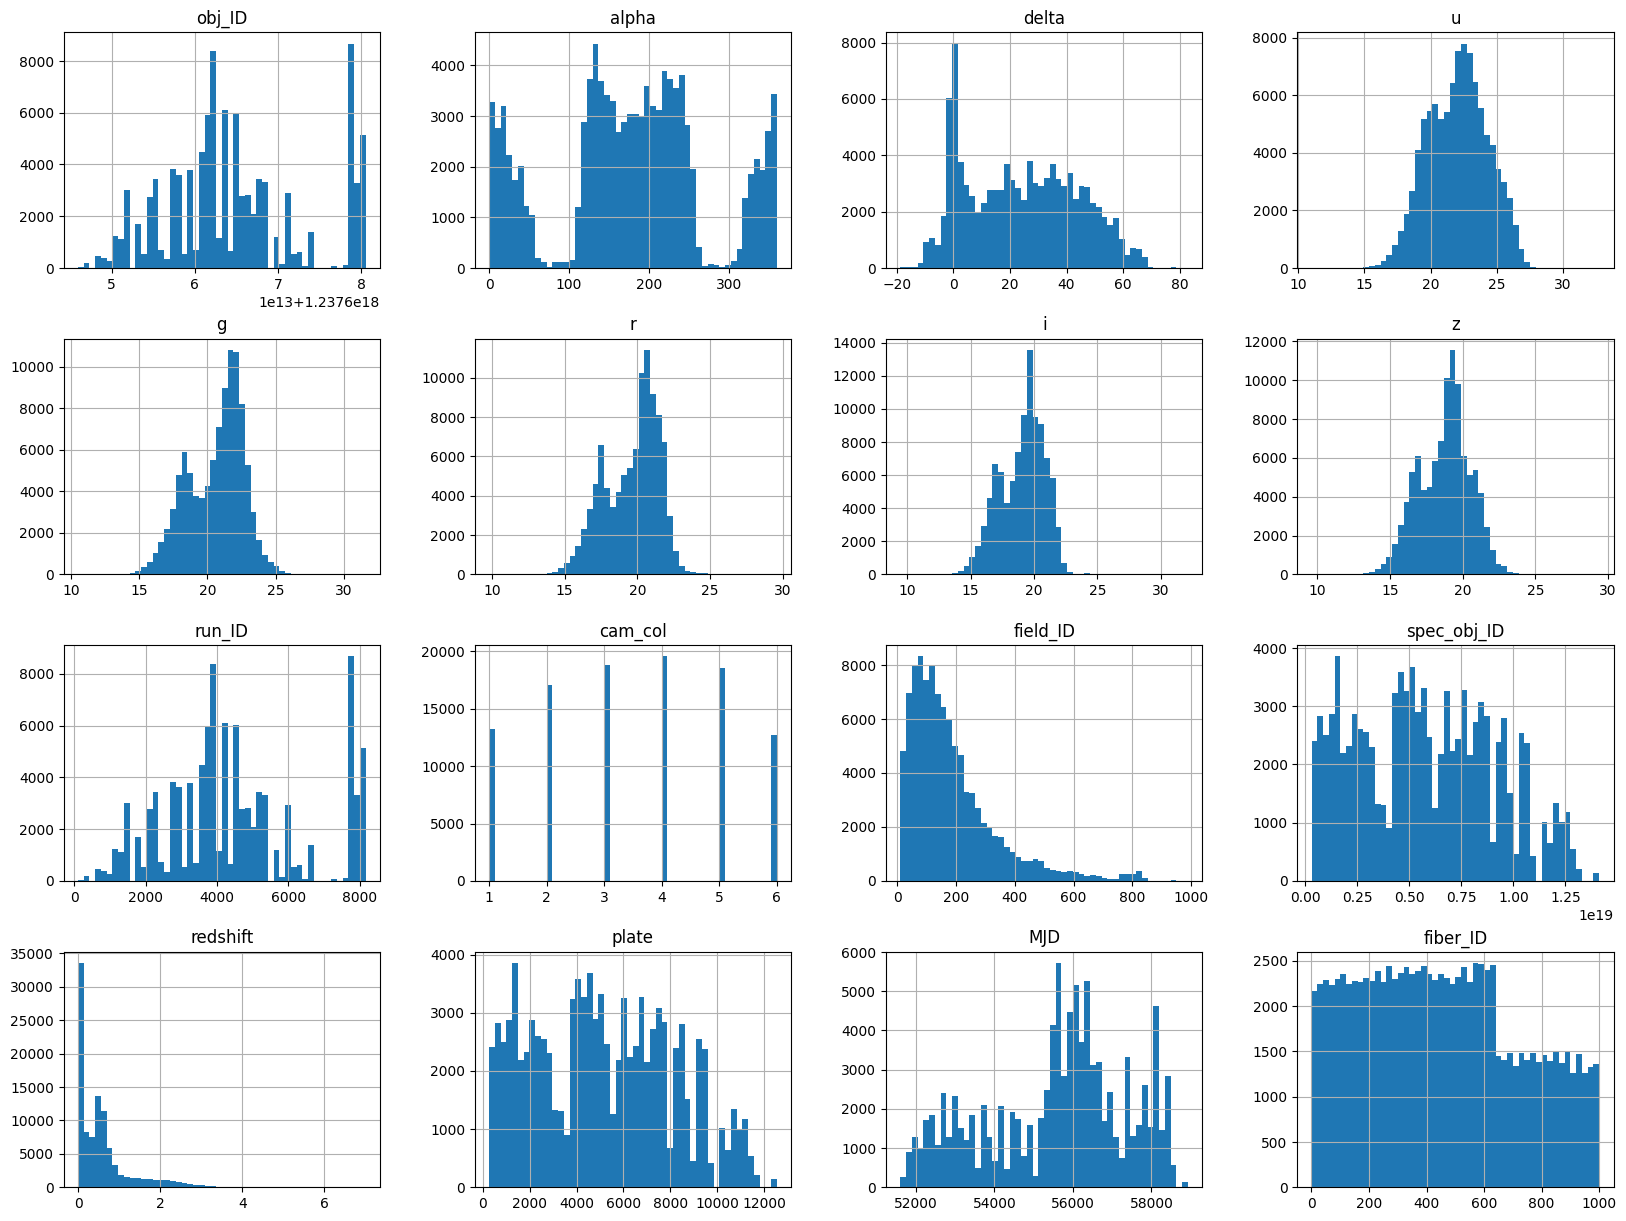

In [111]:
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='class'>

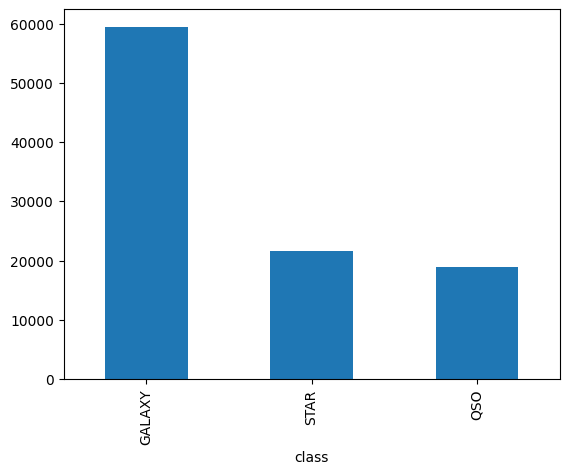

In [112]:
df['class'].value_counts().plot(kind='bar')

### kodowanie klas

In [113]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['class'] = le.fit_transform(df['class'])
# le.classes_, le.transform(le.classes_)

<Axes: >

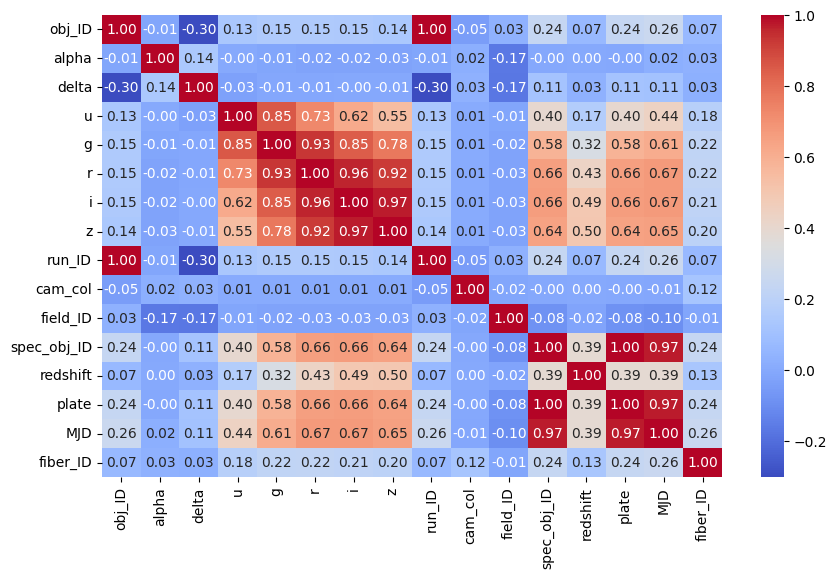

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.corr(numeric_only=True), ax=ax, annot=True, fmt='.2f', cmap='coolwarm')

### Conajmniej 2-3 zmienne można usunąć bo są skorelowane w 100% z innymi

### Wartość korelacji zależna od sposobu zakodowania klas, więc chyba nie powinno się tak robić

In [115]:
# df.corr()['class'].sort_values(ascending=False)

<Axes: xlabel='spec_obj_ID', ylabel='Density'>

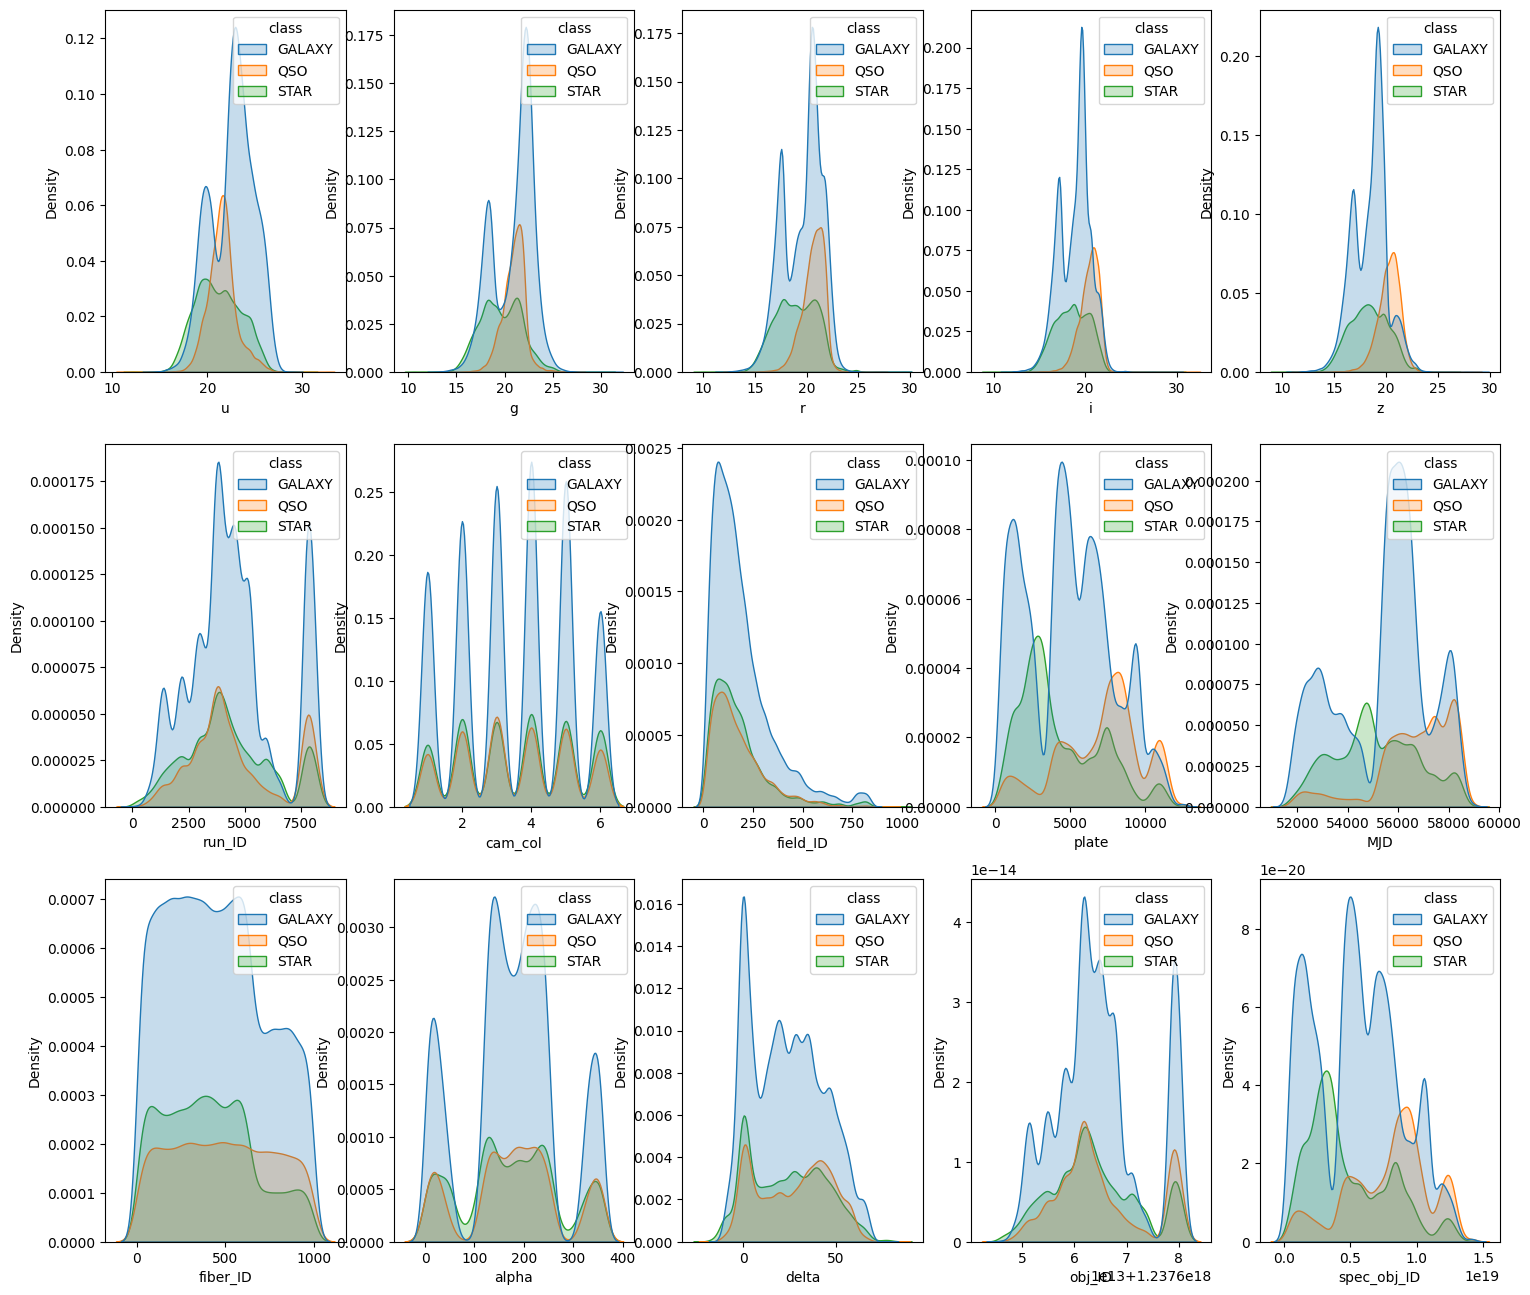

In [125]:
fig, ax = plt.subplots(3, 5, figsize=(18, 16))

sns.kdeplot(df, x='u', hue='class', fill=True, ax=ax[0, 0])
sns.kdeplot(df, x='g', hue='class', fill=True, ax=ax[0, 1])
sns.kdeplot(df, x='r', hue='class', fill=True, ax=ax[0, 2])
sns.kdeplot(df, x='i', hue='class', fill=True, ax=ax[0, 3])
sns.kdeplot(df, x='z', hue='class', fill=True, ax=ax[0, 4])
sns.kdeplot(df, x='run_ID', hue='class', fill=True, ax=ax[1, 0])
sns.kdeplot(df, x='cam_col', hue='class', fill=True, ax=ax[1, 1])
sns.kdeplot(df, x='field_ID', hue='class', fill=True, ax=ax[1, 2])
sns.kdeplot(df, x='plate', hue='class', fill=True, ax=ax[1, 3])
sns.kdeplot(df, x='MJD', hue='class', fill=True, ax=ax[1, 4])
sns.kdeplot(df, x='fiber_ID', hue='class', fill=True, ax=ax[2, 0])
sns.kdeplot(df, x='alpha', hue='class', fill=True, ax=ax[2, 1])
sns.kdeplot(df, x='delta', hue='class', fill=True, ax=ax[2, 2])
sns.kdeplot(df, x='obj_ID', hue='class', fill=True, ax=ax[2, 3])
sns.kdeplot(df, x='spec_obj_ID', hue='class', fill=True, ax=ax[2, 4])

### część zmiennych można odrzucić bo nie ma różnic między klasami

### redshift źle rysuje się w kdeplot

<Axes: xlabel='class', ylabel='redshift'>

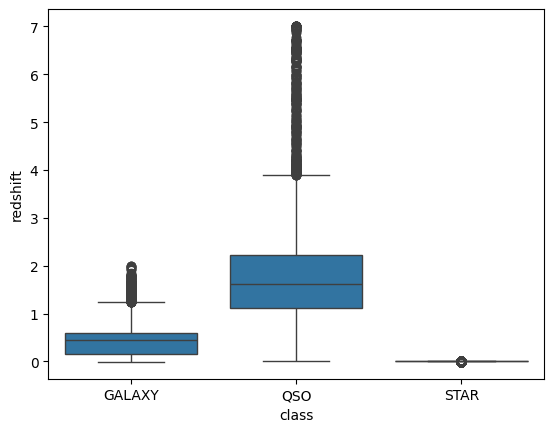

In [117]:
sns.boxplot(data=df, x='class', y='redshift')